In [ ]:
'''
Source:
https://www.kaggle.com/code/datark1/customers-clustering-k-means-dbscan-and-ap
'''

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#read a dataset
df=pd.read_csv('Mall_Customers.csv')

In [4]:
#display data
df.shape

(200, 5)

In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


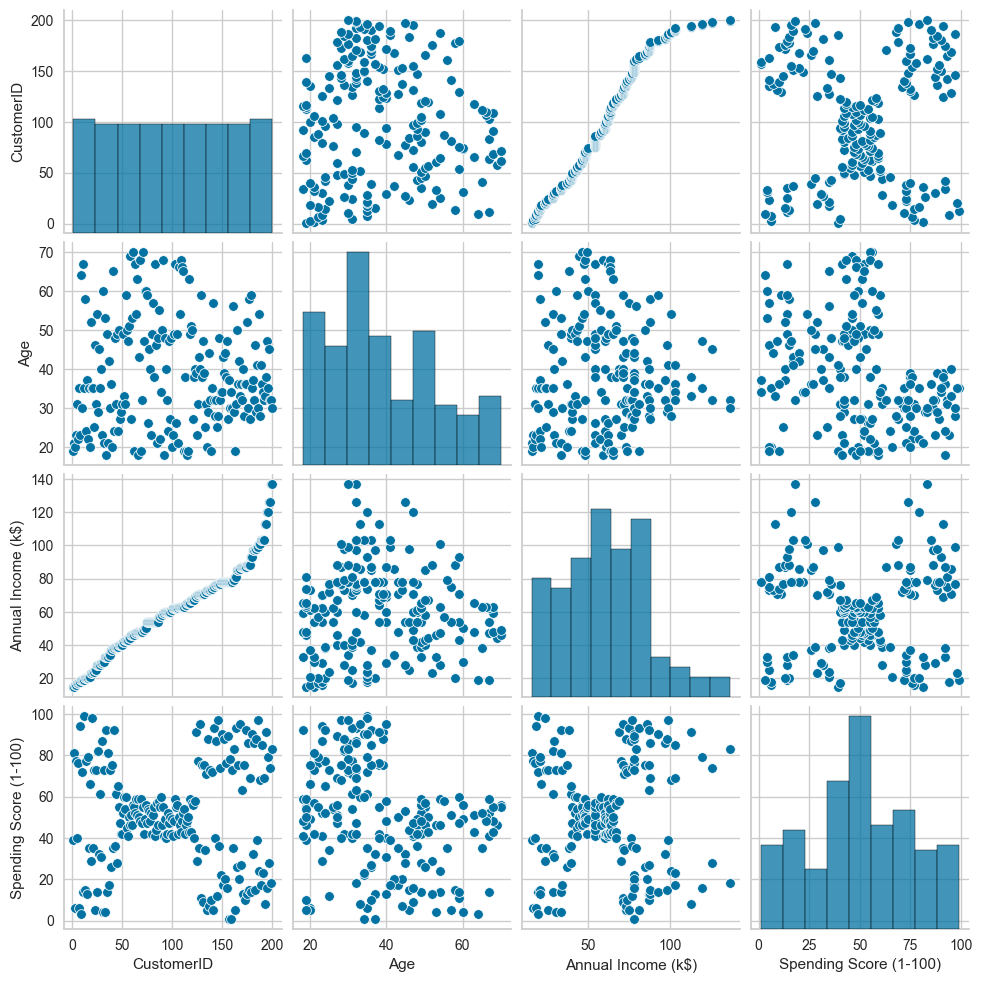

In [6]:
#plot pairplot in Seaborn
sns.pairplot(df)

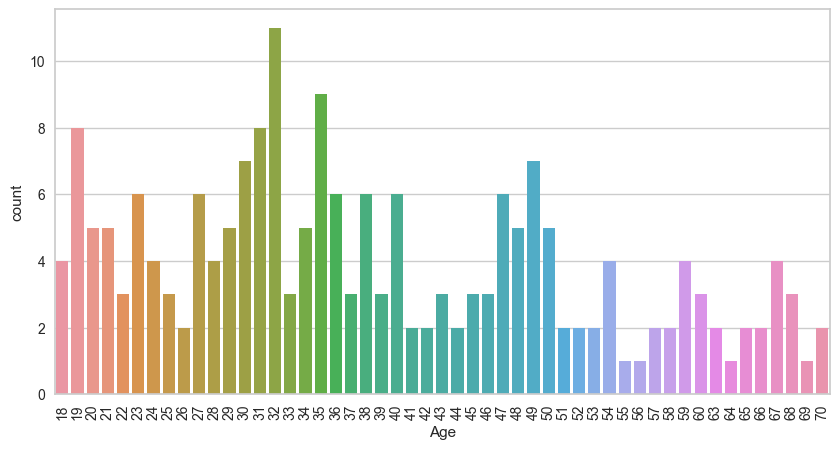

In [7]:
#plot countplot
plt.figure(figsize=(10,5))
sns.countplot(x=df['Age'])
plt.xticks(rotation=90)
plt.show()

In [8]:
#check categorical data
df.isnull().sum().sort_values(ascending = False)[0:10]

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
#rename columns
df.rename(columns={'Annual Income (k$)':'Income','Spending Score (1-100)':'SpendScore'}, inplace=True)

In [10]:
#choose certain columns 

df=df.loc[:, ['Income','SpendScore',]]
print(df)

     Income  SpendScore
0        15          39
1        15          81
2        16           6
3        16          77
4        17          40
..      ...         ...
195     120          79
196     126          28
197     126          74
198     137          18
199     137          83

[200 rows x 2 columns]


In [ ]:
######################
#Choose number of clusters - Elbow chart - Distortion score
######################

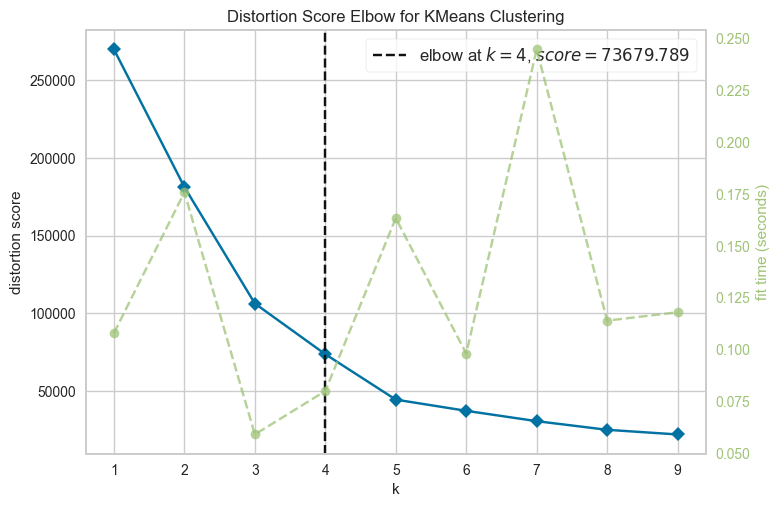

In [29]:
#Plot Elbow chart - using yellowbrick
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

km = KMeans(random_state=1)
visualizer = KElbowVisualizer(km, k=(1,10))

visualizer.fit(df)
visualizer.show()
plt.show()

In [ ]:
######################
#Choose number of clusters - Elbow chart - Silhuette score
######################

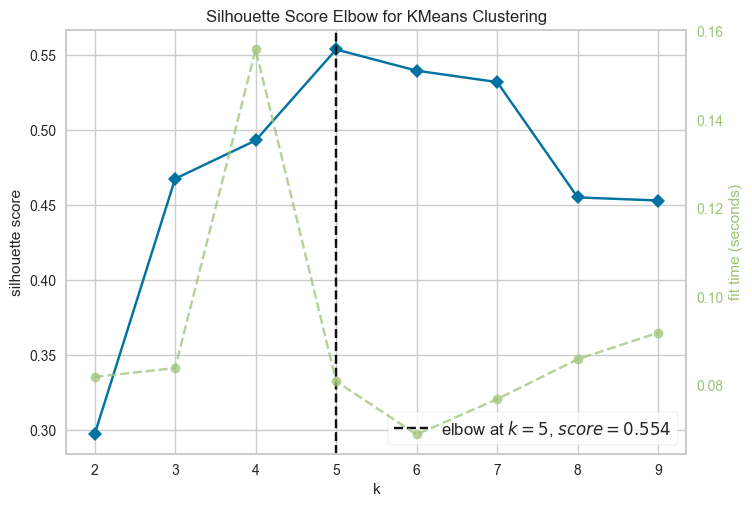

In [28]:
from yellowbrick.cluster import KElbowVisualizer
km = KMeans(random_state=1)
visualizer = KElbowVisualizer(km, k=(2,10), metric='silhouette')

visualizer.fit(df)
visualizer.show()
plt.show()

In [ ]:
######################
#Run KMeans for the best number of clusters
######################

In [25]:
#fitting the model
km1 = KMeans(n_clusters=4,init='k-means++', n_init=10, max_iter=100, random_state=42) 
labels1=km1.fit_predict(df)

km2 = KMeans(n_clusters=5,init='k-means++', n_init=10, max_iter=100, random_state=42) 
labels2=km2.fit_predict(df)

In [26]:
#Getcentroids of the clusters
centroids1=km1.cluster_centers_
centroids2=km2.cluster_centers_

In [ ]:
######################
#Scattered charts
######################

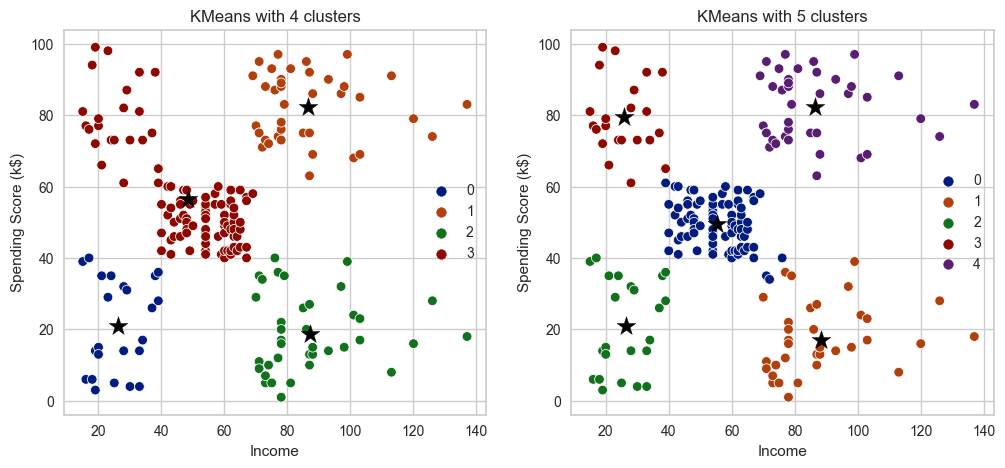

In [27]:

fig1, axes = plt.subplots(1,2,figsize=(12,5))

chart1=sns.scatterplot(data=df, x='Income', y='SpendScore', ax=axes[0],
                hue=labels1, palette='dark', legend='full')

chart2=sns.scatterplot(data=df, x='Income', y='SpendScore', ax=axes[1],
                hue=labels2, palette='dark', legend='full')

#adding centroids
axes[0].scatter(centroids1[:,0], centroids1[:,1], marker='*', s=200, c="black")
axes[1].scatter(centroids2[:,0], centroids2[:,1], marker='*', s=200, c="black")

#adding title and axis names
axes[0].set(title='KMeans with 4 clusters', xlabel='Income', ylabel='Spending Score (k$)')
axes[1].set(title='KMeans with 5 clusters', xlabel='Income', ylabel='Spending Score (k$)')

plt.show()

In [ ]:
######################
#Silhuette charts
######################

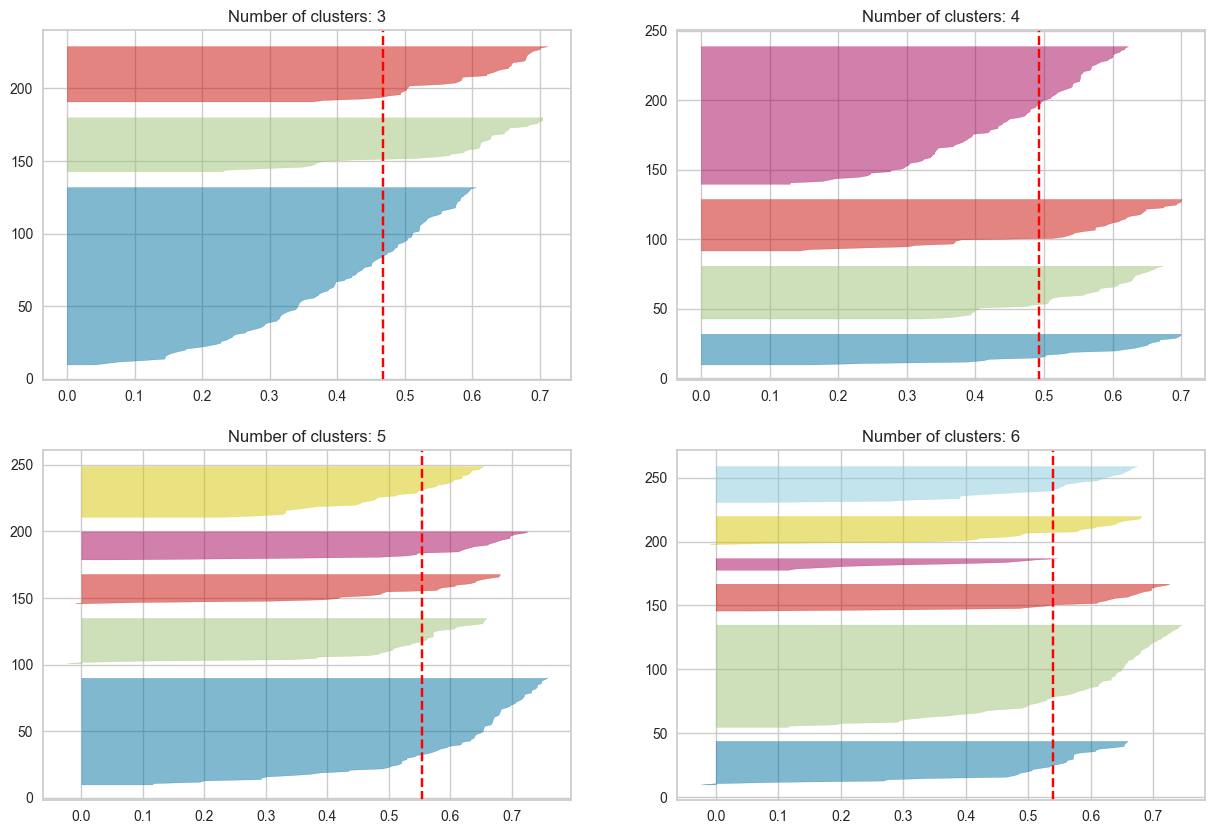

In [20]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans
#https://vitalflux.com/kmeans-silhouette-score-explained-with-python-example/

 
fig, axes = plt.subplots(2, 2, figsize=(15,10))
k=0
for i in [3, 4, 5, 6]:
    
    #Create KMeans instance for different number of clusters
    
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    
    #create coordinates for charts
    if k==0:
        x,y=(0,0)
    elif k==1:
        x,y=(0,1)
    elif k==2:
        x,y=(1,0)
    elif k==3:
        x,y=(1,1)
    k+=1

    #fit visualizer
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=axes[x][y])
    
    #set the name of charts
    name=(f'Number of clusters: {i}')
    axes[x][y].set(title=name) 
    visualizer.fit(df) 

In [22]:
#Get a score table
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#Preperation for the table
model=[3,4,5,6]
col = []
algorithms = pd.DataFrame(columns = col)
idx = 0

#Fit and score algorithm
for a in model:
    
    km = KMeans(n_clusters=a, random_state=0)
    labels = km.fit_predict(df) #saves one line in code instead of using: model.fit(df), labels = model.labels_ 
    score=silhouette_score(df, labels, metric='euclidean')
      
    #definding the table
    algorithms.loc[idx, 'Number of clusters'] = a
    algorithms.loc[idx, 'Silhuette score'] = round(score, 2)
    idx+=1

In [23]:
#printing the accuracy results
algorithms.sort_values(by='Silhuette score', ascending=False)

,Number of clusters,Silhuette score
2,5.0,0.55
3,6.0,0.54
1,4.0,0.49
0,3.0,0.47


In [ ]:
'''
Conclusion:
From the charts above it is possible to see that 5 clusters are closer to the reality than 4 clusters.
'''